In [2]:
from google.colab import files
uploadtrain =  files.upload()

Saving label_training.txt to label_training.txt
Saving training.txt to training.txt


In [4]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(io.BytesIO(uploadtrain['training.txt']), sep = '\s+', header = None)
df.columns = ['Info_id', 'feature_id', 'value']
df.head()

,Info_id,feature_id,value
0,1,6,1.0
1,1,160,31.0
2,1,438,1.0
3,1,479,1.0
4,1,618,1.0


In [5]:
df1 = pd.read_csv('label_training.txt', header = None)
df1.columns = ['labels']
df1.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [6]:
mat = pd.pivot_table(df, index = 'Info_id', columns = 'feature_id', values = 'value')
mat = mat.fillna(0)
mat.head()

feature_id,2,3,4,5,6,8,10,12,15,21,22,23,25,26,27,28,29,31,33,36,38,39,41,42,44,51,52,53,56,63,64,65,66,72,76,78,80,83,85,89,...,26299,26300,26302,26304,26305,26308,26309,26310,26312,26313,26315,26316,26318,26319,26320,26321,26322,26326,26327,26332,26334,26335,26336,26337,26338,26339,26340,26344,26348,26349,26350,26351,26352,26354,26355,26356,26357,26360,26362,26364
Info_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.decomposition import PCA
#mat1 = train.drop(['labels'], axis=1)
pca = PCA(n_components=100)
fit = pca.fit_transform(mat)
mat_df = pd.DataFrame(data = fit)

In [8]:
mat1 = pd.merge(mat_df, df1, left_index = True, right_index=True)
mat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,labels
0,-34.286615,-12.721954,66.547243,38.600362,44.198061,-16.080071,30.154205,-7.114675,-25.047078,8.155958,36.013310,25.962917,32.911562,-5.543206,-0.758582,-6.420062,19.325942,5.741185,-45.049201,43.364403,-40.683237,-8.138507,9.140811,-24.692235,18.336739,68.765499,-7.986162,-23.684914,-39.059662,16.464650,0.919202,31.852778,-22.103665,-7.417009,20.573721,-4.419120,-3.562485,-36.411188,-60.857750,0.879319,...,-1.196189,0.128981,1.395373,-1.012216,-0.160133,-0.836539,0.123443,-0.178916,-0.713644,0.551801,-0.585248,0.851604,0.889150,-1.896270,0.243292,-0.101219,0.912599,0.492410,-1.080505,-0.058473,-0.378896,0.776920,1.160607,0.013548,-0.297849,-0.684081,-0.723503,-0.341204,1.256957,1.670592,0.612238,-0.020897,0.149333,-0.527177,-0.541941,-1.161389,-1.154791,0.441530,-0.177053,1
1,23.901116,-22.975198,-68.809828,-2.183722,14.823012,-38.260772,-32.259866,31.603368,28.485574,-17.838115,2.508111,-41.097644,23.641177,-16.739122,3.646941,53.515177,37.923851,-16.156619,0.789810,7.245697,9.532312,46.518038,43.819888,-57.830605,-4.061133,9.484703,-28.908007,23.975313,16.616407,24.173809,-37.510419,35.415749,-21.983527,-18.591174,30.861683,8.625289,0.040626,8.102063,18.702834,-8.226593,...,0.447878,-0.279374,0.860253,-0.438201,-0.099709,1.542267,2.508900,-0.808300,-1.649140,-0.459177,-0.169159,1.159665,-0.557843,-0.069150,0.014840,0.146071,0.344689,-0.226962,-0.118998,-0.461347,-0.712636,-0.378415,0.065644,0.577482,-0.832862,-0.387913,-0.438302,0.836321,-0.354824,-0.156423,-0.714273,1.635835,0.589737,-0.943442,1.412048,-0.228445,-3.246436,-0.690971,-1.661629,1
2,16.071592,-32.588397,37.704559,53.023685,21.358713,-24.571468,-49.949174,-23.518261,-47.424870,-16.332495,83.105093,19.084792,-32.114304,-23.101705,1.052174,55.688575,-19.891466,-24.519777,-39.875351,29.746537,20.978377,-31.901999,-16.203814,-43.617110,39.286925,6.229675,-31.570592,5.353984,23.498689,14.432442,17.969991,29.306188,-37.988258,-4.284061,5.852345,-11.093709,1.273203,-12.002374,11.905219,19.342088,...,-0.080161,-0.550612,-1.886825,-0.601651,0.387662,1.932973,-0.484355,-0.072904,0.742332,-0.538533,0.496703,-1.316409,-0.205155,1.239193,0.194745,0.349924,-0.081570,-0.374787,0.682132,0.423350,0.724275,-0.611493,-0.999665,0.876686,0.106203,0.109731,-0.867263,0.195049,-0.396616,-0.217688,0.592326,0.731239,0.554982,0.225249,0.237593,-0.817168,0.927869,0.765399,0.491672,1
3,7.736907,-25.975390,37.202887,-7.463795,24.550725,-20.133819,-2.003962,5.738670,16.987992,24.182175,-0.843551,5.424937,-56.353170,-7.178428,-23.243953,30.951218,3.137014,36.122407,-36.815911,5.033386,27.972731,-15.622470,-33.549515,-16.778337,4.996819,-17.291664,-27.395690,-14.564795,-5.320009,31.466921,0.481222,7.142111,-8.102668,-26.653859,-26.479365,-2.165070,23.334173,-3.876824,1.740165,52.353137,...,-0.174741,-0.398824,-0.701739,1.223556,-0.292980,-0.453360,0.265497,-1.385757,1.347760,1.774241,-0.100013,0.399197,-0.121867,0.373159,0.113807,0.245890,0.496187,-1.173020,0.651392,0.600637,0.124934,0.730498,0.336760,-1.216113,-1.151666,0.008792,-1.051343,0.192919,-0.094989,0.275964,0.091859,-0.354441,0.395789,-0.448192,0.543675,-0.172401,-0.312013,-0.063381,1.017625,1
4,3.076045,-5.450483,-4.501322,-83.236003,-78.201476,-18.274651,-14.541837,26.240233,-2.269347,74.312457,25.970956,-4.632598,-6.532892,11.798272,34.648578,3.159208,17.775208,16.345217,-23.871294,-40.560748,-58.703020,21.061998,-33.578670,-1.802381,-24.204241,41.213498,21.116942,-43.481985,11.060396,2.628134,61.436101,39.089203,-2.715558,-24.492062,-14.058377,-41.607084,7.493554,22.782246,-29.662276,-11.818569,...,0.432088,-0.640117,-0.753401,-0.177163,-1.272036,1.197535,0.057270,1.002777,0.164167,-0.020905,-0.308195,-0.263422,-0.360344,-0.112446,-0.588121,-0.030603,0.595770,-0.486086,0.618564,0.867294,0.0163

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mat1, test_size=0.2)

In [10]:
X = train.drop(['labels'], axis=1)
X.values

array([[ 4.40194945e+01,  1.61851270e+00, -1.08736027e+01, ...,
        -5.11764355e-02, -7.42315976e-01,  6.32868006e-01],
       [-5.30976928e+01,  3.71314299e+01, -3.20991401e+00, ...,
         5.12947425e+00, -7.41520265e+00, -4.02135326e+00],
       [-2.35627732e+00, -1.91391222e+00,  7.15680243e+01, ...,
         4.21140780e-01, -3.03538990e-01,  6.35484491e-01],
       ...,
       [ 2.51245803e+01, -2.09108357e+01, -5.77954438e+01, ...,
         1.14971220e-01, -6.14190210e-01,  4.91650598e-01],
       [ 6.00032947e+00, -2.55290497e+01, -6.75512200e+00, ...,
        -1.57145652e+00, -7.09565059e-01,  9.50038630e-02],
       [-1.40930382e+01, -4.01799369e-01, -5.09375098e+01, ...,
         2.44174677e-02,  1.30194396e-01, -3.96983364e-01]])

In [11]:
Y=train['labels']
Y.head()

33     -1
1428   -1
590     1
1200    1
407    -1
Name: labels, dtype: int64

In [12]:
X1 = test.drop(['labels'], axis=1)
X1.values

array([[ 1.55662904e+01, -5.17465137e+01, -2.46532377e+01, ...,
         2.93180414e-01,  6.88461952e-02, -2.72635916e-01],
       [-5.49964445e+00, -2.07131102e+01, -6.35520476e+01, ...,
        -5.21438748e-01,  1.02716499e-01, -3.69222807e-01],
       [-1.65700656e+01,  1.62652459e+01,  7.01132126e+00, ...,
        -4.57985509e-01, -2.70962380e-03, -1.86546496e-01],
       ...,
       [-1.58139424e+01,  3.37355986e+00,  5.07587472e+01, ...,
         1.03287496e-01,  8.73983023e-02,  1.04904194e+00],
       [ 1.56509120e+01, -3.78997975e+01,  3.53099528e+01, ...,
         2.57440528e-01, -6.92979579e-01,  3.10112153e-02],
       [-8.17280286e+00,  1.33631616e+01,  3.30877087e+00, ...,
         6.35810071e-02, -2.39915097e-01,  5.03995037e-01]])

In [13]:
Y1 = test['labels']
Y1

984     1
655     1
1203    1
826    -1
683     1
       ..
96      1
578    -1
1114    1
1615   -1
985     1
Name: labels, Length: 369, dtype: int64

In [14]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
numBaseClassifiers = 500
maxdepth = 3
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)

trainAcc = []
testAcc = []
clf.fit(X, Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
predY = clf.predict(X1)
predY

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1

0.8888888888888888


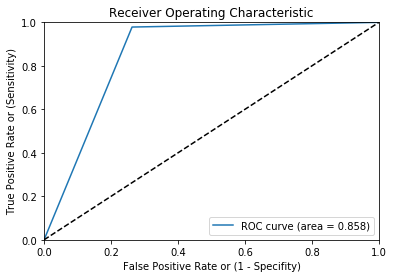

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
print(accuracy_score(Y1, predY))
fpr,tpr, thresholds = roc_curve(Y1,predY)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [17]:
pip install yellowbrick

0.9842519092156153

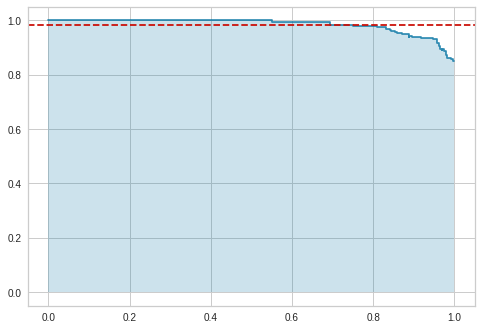

In [19]:

from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
viz = PrecisionRecallCurve(clf)
viz.fit(X, Y)
viz.score(X1,Y1)

0.8915989159891599

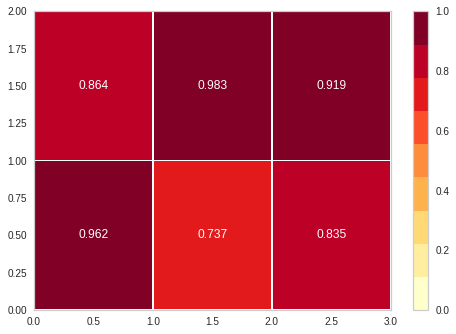

In [21]:
viz = ClassificationReport(clf)
viz.fit(X, Y)
viz.score(X1,Y1)